# Supervised Learning
Supervised learning is a game with the following objective. You are given a data set $D$ with $N$ examples and $M$ attributes. For example, in Iris data set $N=150$ and $M=4$. Let us denote the attribute vector of the $i$-th example as $x_i$. Let us also assume that for the $i$-th example in $D$ we also know its label $y_i$. For example, in the Iris data set, $x_i$ are values of the 4 attrbutes for the $i$-th flower and $y_i$ tells us to which of the 3 types of irises the $i$-th flower belongs to. The whole data set is a set of labeled pairs, $D = \{(x_i,y_1), i=1...N\}$.  The objective of supervised learning is to come up with a computer program, called *predictor*, that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input a data set `D` and the name of a supervised learning algorithm `algorithm_type`, and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

## kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the nearest neighbor. `k = 1` choice might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Thus, we would need to figure out which choice of `k` is the best for a given data set. Other parameter choice decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true label. The percentage of the correct guesses on `D_test` is reported as *accuracy* of `predictor`.

### kNN Example
Let us illustrate how kNN works on an example. We start by loading the appropriate libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. It is intended to illustrate how kNN works on the Iris data set, where only the first 2 atttributes are used. Thanks to the examples having only 2 attributes, we will be able to visualize the data set with a scatter plot. Let us run the code.

<Figure size 432x288 with 0 Axes>

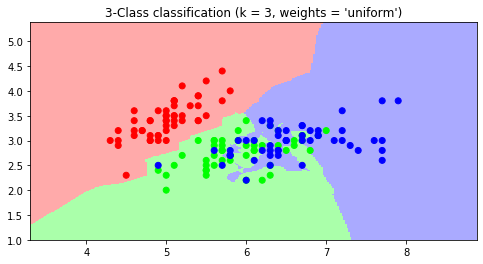

In [6]:
k = 3   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data
predictor = neighbors.KNeighborsClassifier(k, weights='uniform')
predictor.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Provide predictions on all points in the mesh
Z = predictor.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(8,4))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

You can change value of k to some other values, such as 3 or 25 and observe if there is any difference. Please take a moment to study functionality of the `neighbors` module.

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [8]:
#from sklearn.neighbors import KNeighborsClassifier
k = 10   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [11]:
# select the first 4 test examples
i = [0,1,2,3,4,5]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
#print(np.array(zip(yhat,y_test[i])))
print(yhat)
print(y_test[i])

[[5.8 2.7]
 [5.  2. ]
 [5.6 3. ]
 [5.9 3.2]
 [5.5 3.5]
 [6.7 2.5]]
[1 1 1 1 0 1]
[2 1 1 1 0 2]


By looking at the content of the printed array, you are able to check how accurate is the predictor on the first 4 test examples. In particular, the accuracy is the percentage of correct guess. The methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy on the whole test set with a single line of code:

In [12]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.82


### Types of supervised learning problems
**Classification**. $y$ is a categorical value (e.g., type of a flower). A special case is that $y$ is binary -- it can have one of two possible values. If |y|>2, the problem is called the *multi-class classification*.

**Regression**. $y$ is a nummerical value (i.e. wind speed). 

### Accuracy
**Accuracy in classification**. In classification, *percent correct* (percentage of correct predictions) or *error rate* (fraction of wrong predictions) are the most popular. However, we can introduce different costs for different types of mistakes and then report the average cost. Sometimes people like to talk about precition and recall. Sometimes, ranking is important (e.g., in problems such as providing recommendations, retrieving information), where we want the positives to be ranked as high as possible. In this case, people use the ROC curve (showing relationship between FP vs. TP rate) and AUC (the Area uUnder the ROC Curve). 

**Accuracy in Regression**. In regression, *Mean Squared Error (MSE)* is the most popular, although *Mean Absolute Error (MAE)* is also used sometimes. $R^2$ is also popular and is calculated as $R^2 = 1 - MSE/var(y)$ because it can be at best 1 and it equals zero for a trivial predictor $f(x) = mean(y)$.

### Supervised learning:  stakeholders
To better understand the stakeholders in supervised learning, let us look at the following analogy. 

**Analogy: Predictor as a car**. To get a better insight, it could be useful to think about a `predictor` as a product. A product is manufactured in a factory and is sold to a customer who intends to use it. Let us imagine that the product is a car. When deciding what car to buy, the customer considers properties of a product such as acceleration, mileage, and safety. In the world of supervised learning, a car is analogous to a `predictor`, and a data science customer worries about accuracy and computational cost. The customer does not necessarily need to know about the insides of the `predictor` and how it was designed and produced. From the *customer* perspective, it is convenient to think about a `predictor` as a box that receives an example $x_{new}$ at input and produces prediction $y_{new}$ at its output. On the side of a car company, the job is more complicated. It needs to decide how to build a car cheaply such that its performance is as good as possible. Before selling the car, the company also needs to carefully test the car to precisely determine its performance. It is critical for the reputation of the car company to properly test the car and report on its performance. Similarly, in the supervised learning world the objectives are to figure our how to build a `predictor` that is as accurate and computationally efficient as possible and precisely test its accuracy. Being a data scientists means being able to create the `predictor` product that is satisfactory for the customers. 

### Lazy supervised learning algorithms - kNN
Since we alredy learned about kNN, let us consider the content of its `predictor` box. It contains the whole training data set and an algorithm that loops through all training examples to find $k$ examples that are the nearest to an example provided at its input. Labels of those $k$ nearest neighbors are used to provide the output. Looking from the *factory* perspective, it did not have to do much -- it just placed to whole training data set in the *box* and provided a pre-packaged algorithm to scan it to provide predictions. The *consumer* is paying the price -- to obtain a prediction for a single example takes $O(MN)$ time, which is dominated by the time to find the k nearest neighbors in the training data. 

### Non-lazy supervised learning algorithms
With the exception of kNN, most other popular supervised learning algorithms produce `predictors` that are a mathematical function $f(x)$ of the input $x$, such that $f(x)$ is accurately predicting the true labels $y$. Here are the most popular examples of such `predictors`:
1. Linear predictor: $f(x)$ is a linear function of attributes in $x$. For example $f(x) = 3+2x_1 - 4x_2$.
2. Nonlinear predictor: $f(x)$ is not a linear function of attributes in $x$. For example $f(x) = 3+2{x_1}^2 - 4x_1x_2$. There are several popular types of predictors that we will cover in this course:
    3. Link functions / neurons: $f(x)$ is a nonlinear transformation of a linear function of $x$, $f(x) = nonlinear\_function(linear\_combination(x))$. For example, $f(x) = tanh(3+2x_1 - 4x_2)$.
    4. Neural network: $f(x)$ is created by connecting many neurons to each other. By doing this, we are gaining ability to create very complicated functions that result in "smart" predictors. 
    5. Decision trees: $f(x)$ is a series of if-else questions about attributes that ends in a prediction. The first if-else question is always the same, while any later questions depend on the answers to the previous questions. The resulting function can be represented as a decision tree which contains answers in its leafs. 

The benefit of non-lazy `predictors` is that they are very computationally efficient to use. The typical cost of using them to provide a prediction for a single example is $O(M)$. The price paid is that the *factory* needs to work hard to learn a good $f(x)$. 

### Differences between different predictors
To get a feeling about the difference between different types of predictors, let us run the demo code taken from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. The resulting figure shows the predictions coming out of 9 different supervised learning algorithms on 3 different binary classification data sets.

c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


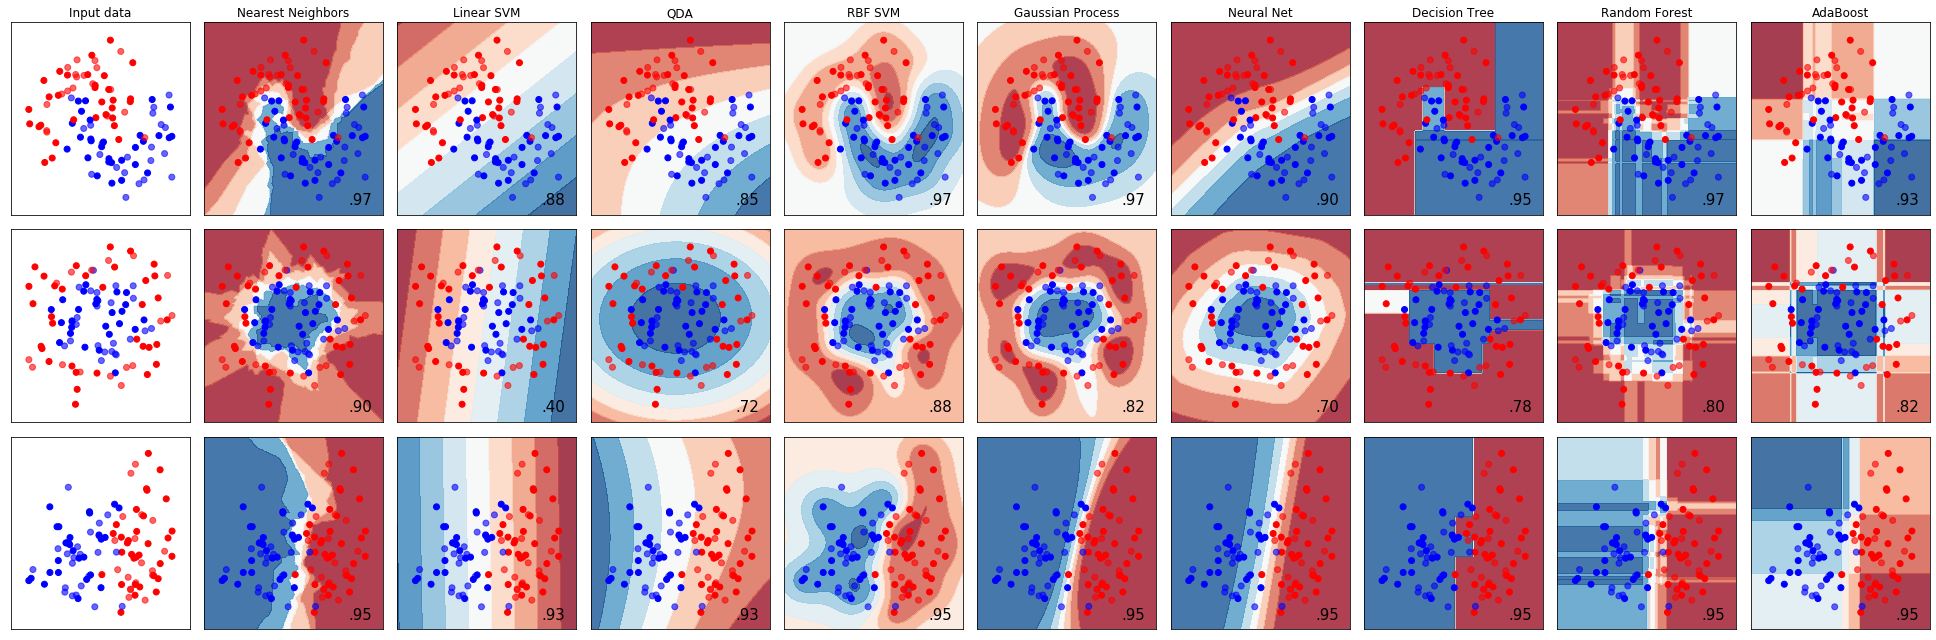

In [22]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "QDA", "RBF SVM", "Gaussian Process",
         "Neural Net", "Decision Tree", "Random Forest", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    QuadraticDiscriminantAnalysis(),   
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    MLPClassifier(alpha=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

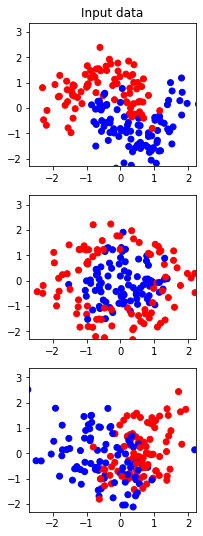

In [21]:
# The following code serves just to plot the 3 data sets in larger detail
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=300, noise=0.3, random_state=0),
            make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

i =1
plt.figure(figsize=(3, 9))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets),  1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    i += 1

plt.show()

### Discussion of the results
Let us discuss the outcomes is some detail. The first row corresponds to `make_moons` data set where the 2 classes are forming moon shapes, the second to `make_circles` data set where the 2 classes form a circle and a ring around the circle, and the third to `linearly_separable` data set where the classes could be best separated by a straight line. The first column are the scatter plots of the 3 training data sets. The second column are predictions of the kNN classifier with $k=3$. We can observe dark blue and dark red areas where kNN is very confident in its predictions and the lighter areas where the confidence is lower. The third column are predictions from a linear predictor called the linear SVM (Support Vertor Machine). In this case, the predictor can only draw a line to separate positive and negative examples, which is clearly not a good idea for the first 2 data sets. This explains a much lower accuracy (measured on the training data, which can be slightly deceiving!) of linear SVM on the first 2 data sets than the kNN. The fourt column is an oucome of a QDA predictor that provide a smooth curved separation between the classes. The observed accuracy on the first 2 data sets is somewhere between kNN and linear SVM. The following 3 columns are representatives of more flexible curved separation between the classes. The last of those columns is a popular feedforward neural network. We can see that all 3 predictors achieve quite a high accuracy. The next column are predictions coming out of a decision trees that is characterized by horizontal and vertical lines. We will see in the following lecture why is this so. The final two columns are predictions of the so-called ensembles of decision trees which are also characterized by horizontal and versical lines.

# Decision trees - summary notes

As a suplement to your own lecture notes, please read Chapter 4 about the decision trees accesible at: http://www-users.cs.umn.edu/~kumar/dmbook/index.php#item2. You can also take a look at the power point slides for Chapter 4 at the same web page, which we used during our lectures on the topic. 

As a reminder of what we covered in class, here is a bulleted list:
- We showed an example data set and a decision tree. We explained how a decision tree is used to provide predictions.
- We discussed how to calculate the accuracy (percent correct guesses) on a test set. 
- We introduced other commonly used accuracy measures -- precision/recall/f-score, average cost, ROC/AUC
- We discussed the representation power of decision trees: they split the attribute space into boxes. 
- We discussed the anatomy of decision trees: what kinds of decision nodes (binary, categorical questions, formula questions), difference between numerical and categorical attributes, difference between classification (leafs are class decisions) and regression (leafs are number predictions).
- Decision trees, if their size is small, can provide an insight into the decisions, unlike kNN aclassification.
- Learning: how to build a good tree from training data. Start by asking the best first question (that has the highest accuracy or achieves the largest purity between the classes). This question splits the training data. We can already use the resulting tree having a single question to predict. Or, we can continue. If we can continue, we repeat the node splitting. The process is stopped once each node has examples of only a single class (pure nodes). Such fully grown tree will have 100% accuracy on training data. 
- We introduced 3 node spliting criteria: misclassification error, GINI, and Entropy. If more than one attribute results in the same quality of split, we pick the simplest question (this is an example of Occam's razor principle -- the simplest description is the most likely to generalize well). 
- We discussed overfitting issue (trying too hard on training data and ending up doing poorly on test data) and how to prevent it (early stopping using a formula or a validation data set, or using post-pruning).
- We emphasized the importance of properly estimating the accuracy of a decisions tree. First, always split the data randomly into training and test set, build a tree using the training data set and check its accuracy using the test set. If early stopping or post-pruning is used to control overfitting, split the trining data into training and validation, where validation data are used purely to decide how large the decision tree should be. 
- The impact of data size: if the data is too small, splitting into trainign and testing can be too inefficient (too little training examples to build a good decision tree, too few test examples to properly test its accuracy). In this case, people like to use cross-validation. If the data is too large, using all training examples can be computationally too costly -- training on a subset could be much faster without losing on accuracy.
- We discussed uncertaintly in accuracy estimation. We showed how to calculate the confidence interval for accuracy (could be done computationally or using a statistical formula).